<a href="https://colab.research.google.com/github/dheerajbiswas/ML-Assign/blob/main/Dheeraj_Kumar_Biswas_P24EE003_Assignment1_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 01 for Machine Learning (2024-25)
**Subject Code: CS550/DSL501**

**Problem Statement:<br>
For the Wine Quality Data Set, convert all the values in the quality attribute to
0 (bad) if the value is less than or equal to 6 and to 1 (good) otherwise. Normalize
all the other attributes between 0 and 1 by min-max scaling. Mention why we use
min-max scaling.**

In [82]:
import pandas as pd
import numpy as np

wineqt = pd.read_csv('WineQT.csv')
wineqt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [83]:
wineqt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


We use `describe()` and see that the feature values do not have normalized values and "quality" is not in the [0, 1] format.

In [84]:
quality = np.array(wineqt['quality'])
quality

array([5, 5, 5, ..., 5, 6, 5])

**Assigning the values of quality feature column to 0 if it is less than or equal to 6 and 1 if greater than 6**

In [85]:
bad = quality <= 6
good = quality > 6
quality[bad] = 0
quality[good] = 1

In [86]:
quality[:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

The values of "quality" feature is now either 0 or 1.

The *min-max normalization*:<br>
This normalization is a linear transformation on the raw data to bring the values of the observations between 0 to 1.

Min-max normalization keeps the associative relation between the raw data values. Because the data is scaled and brought between the range 0 to 1, there has an effect of smaller standard deviation which cause the outltiers to be skipped in the analysis.

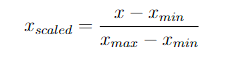

In [87]:
# example normalization for single column at a time
wineqt['fixed acidity'] = (wineqt['fixed acidity'] - wineqt['fixed acidity'].min()) / (wineqt['fixed acidity'].max() - wineqt['fixed acidity'].min())

In [88]:
# Defining the min-max() function
def min_max(feature = []):
  feature = (feature - feature.min()) / (feature.max() - feature.min())
  return feature

In [89]:
# applying the defined min-max() function to all the features of the dataframe wineqt

wineqt = wineqt.apply(min_max).drop('quality', axis=1)

# lastly adding the modified quality feature column
wineqt['quality']  = quality

In [90]:
wineqt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.328417,0.281739,0.268364,0.111791,0.125096,0.218142,0.141041,0.489017,0.449618,0.196232,0.314171,0.504051,0.139108
std,0.154654,0.123036,0.196686,0.092871,0.078910,0.152992,0.115838,0.141341,0.123358,0.102035,0.166492,0.290543,0.346210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.186644,0.090000,0.068493,0.096828,0.089552,0.053004,0.403818,0.366142,0.131737,0.169231,0.257358,0.000000
50%,0.292035,0.273973,0.250000,0.089041,0.111853,0.179104,0.109541,0.485316,0.448819,0.173653,0.276923,0.497182,0.000000
75%,0.398230,0.356164,0.420000,0.116438,0.130217,0.298507,0.194346,0.570852,0.519685,0.239521,0.415385,0.757358,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Result: Now we observe in the **min** and **max** row that the minimum values of all the feature/attribute column is 0 and 1 repectively. Also that the "quality" feature column is quantized to 0 or 1, and all the other feature columns are normalized have a value in range 0 to 1.